<a href="https://colab.research.google.com/github/JoanMR-dev/Data-Analyst/blob/main/Analisis%20Exploratorio%20de%20Datos/AED_Poblacion_Mundial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Población Mundial.**

Los datos muestran la población de cada país desde 1970 hasta hoy (por decadas). Tambien se tiene densidad, area (km^2), tasa de crecimiento.

1. Rango - Rango del País en particular (Decidido por la Población).
2. CCA3 - Código de 3 dígitos de un país concreto.
3. País - Nombre del país.
4. Continente - Nombre del continente al que pertenece el país.
5. Población 2022 - La población del país en el año 2022.
6. Población de 2020 - La población del país en el año 2020.
7. Población de 2015 - La población del país en el año 2015.
8. Población de 2010 - La población del país en el año 2010.
9. Población del año 2000 - La población del país en el año 2000.
10. Población de 1990 - La población del país en el año 1990.
11. Población de 1980 - La población del país en el año 1980.
12. Población de 1970 - La población del país en el año 1970.
13. Superficie - La superficie del país (medida en km^2).
14. Densidad - La densidad de población del país (medida por km^2).
15. Tasa de crecimiento - La tasa de crecimiento de la población del país.
16. Porcentaje de la población mundial - El porcentaje de la población mundial que reside en ese país.

*Datos de la oficina de censo de los Estados Unidos.*

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px
import missingno as msno
import plotly.offline as py
import warnings
warnings.filterwarnings('ignore')
py.init_notebook_mode(connected=True)




In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/DATASETS/world population/world_population.csv', error_bad_lines = False)
data.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [ ]:
data.shape

(234, 17)

In [ ]:
data.describe().T.sort_values(ascending = 0,by = "mean").style.background_gradient(cmap = "BuGn")\
.bar(subset = ["std"], color ="red").bar(subset = ["mean"], color ="blue")

,count,mean,std,min,25%,50%,75%,max
2022 Population,234.000000,34074414.709402,136766424.804763,510.000000,419738.500000,5559944.500000,22476504.750000,1425887337.000000
2020 Population,234.000000,33501070.952991,135589876.924439,520.000000,415284.500000,5493074.500000,21447979.500000,1424929781.000000
2015 Population,234.000000,31729956.243590,130404992.751760,564.000000,404676.000000,5307400.000000,19730853.750000,1393715448.000000
2010 Population,234.000000,29845235.034188,124218487.632998,596.000000,393149.000000,4942770.500000,19159567.500000,1348191368.000000
2000 Population,234.000000,26269468.816239,111698206.719070,651.000000,327242.000000,4292907.000000,15762301.000000,1264099069.000000
1990 Population,234.000000,22710220.790598,97832173.346751,700.000000,264115.750000,3825409.500000,11869231.000000,1153704252.000000
1980 Population,234.000000,18984616.970085,81785186.084201,733.000000,229614.250000,3141145.500000,9826053.750000,982372466.000000
1970 Population,234.000000,15786908.807692,67795091.643236,752.000000,155997.000000,2604830.000000,8817329.000000,822534450.000000
Area (km²),234.000000,581449.384615,1761840.864063,1.000000,2650.000000,81199.500000,430425.750000,17098242.000000
Density (per km²),234.000000,452.127044,2066.121904,0.026100,38.417875,95.346750,238.933250,23172.266700


In [ ]:
#Obteniendo valores unicos de cada columna.
features = data.columns
for feature in features:
    print(f"{feature} ---> {data[feature].nunique()}")

Rank ---> 234
CCA3 ---> 234
Country ---> 234
Capital ---> 234
Continent ---> 6
2022 Population ---> 234
2020 Population ---> 234
2015 Population ---> 234
2010 Population ---> 234
2000 Population ---> 234
1990 Population ---> 234
1980 Population ---> 234
1970 Population ---> 234
Area (km²) ---> 233
Density (per km²) ---> 234
Growth Rate ---> 180
World Population Percentage ---> 70


In [ ]:
data.isnull().sum()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

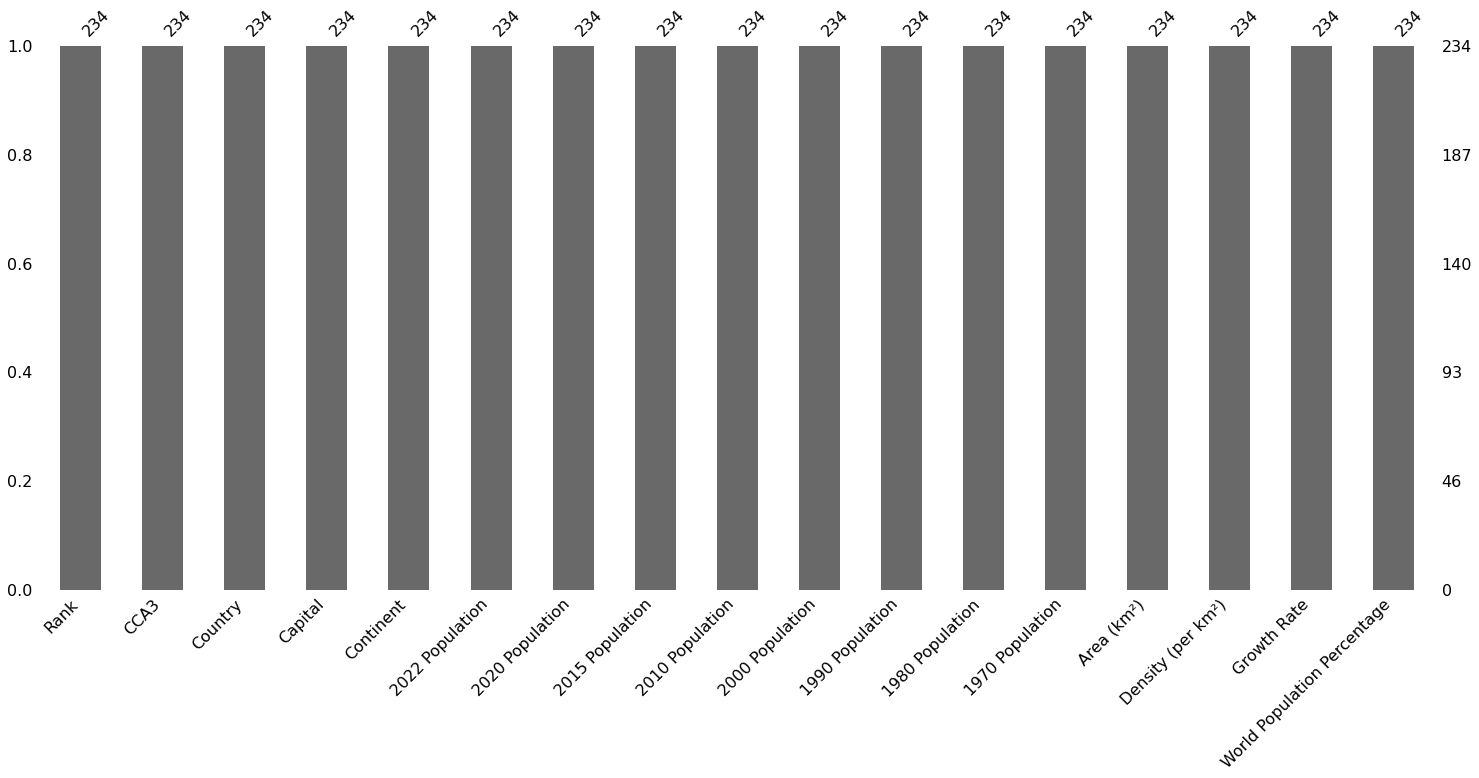

In [ ]:
msno.bar(data)

En la previsualización el datafreme no contiene datos nulos o faltantes.



**Analisis de continentes.**

In [ ]:
continent_data =  data.groupby('Continent')[features].mean().sort_values(by = "Density (per km²)",ascending = False)
continent_data.style.background_gradient(cmap = "BuGn")

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Continent,,,,,,,,,,,,,
Asia,77.560000,94427665.480000,93261730.700000,89165003.640000,84400826.540000,74701792.080000,64211271.540000,52706684.560000,42898125.800000,642762.820000,1025.024136,1.009384,1.183800
Europe,124.500000,14862950.760000,14915843.920000,14830712.160000,14712278.680000,14521868.460000,14406415.940000,13850543.180000,13118479.820000,460208.220000,663.324742,1.002256,0.186600
North America,160.925000,15007403.400000,14855914.825000,14259596.250000,13568016.275000,12151739.600000,10531660.625000,9207334.025000,7885865.150000,606104.450000,272.761758,1.004175,0.187750
Oceania,188.521739,1958198.000000,1910148.956522,1756664.478261,1613163.652174,1357512.086957,1162774.869565,996532.173913,846968.260870,370220.913043,132.543065,1.007383,0.023913
Africa,92.157895,25030367.228070,23871435.263158,21071972.666667,18512773.192982,14367474.245614,11195625.070175,8448006.614035,6411304.350877,531894.087719,125.047646,1.021244,0.313509
South America,97.571429,31201186.285714,30823574.500000,29509599.714286,28077017.857143,24973877.285714,21224743.928571,17270643.285714,13781939.714286,1273813.000000,20.971979,1.007957,0.391429


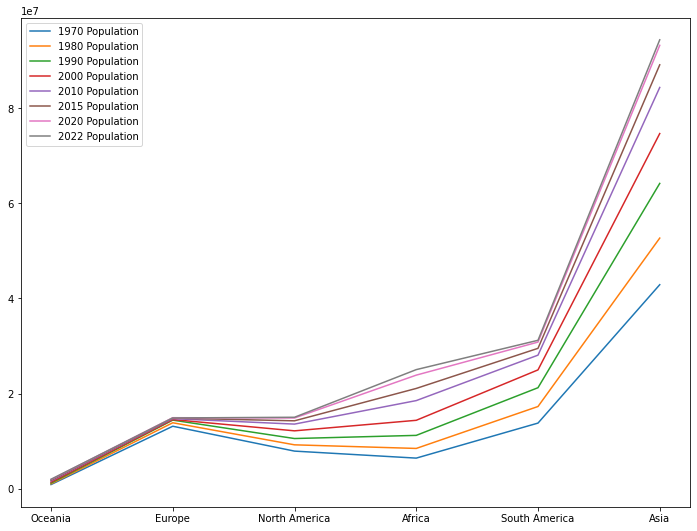

In [ ]:
#All continents
continent_data.sort_values(by = '2022 Population',inplace = True)
plt.figure(figsize = (12,9))
population_features = ['2022 Population','2020 Population','2015 Population','2010 Population','2000 Population','1990 Population','1980 Population','1970 Population']
population_features.reverse()
for feature in population_features:
    plt.plot(continent_data[feature],label = feature)
plt.legend()
plt.show()

**Analisis individual de paises**

In [42]:
fig = px.choropleth(data,
                    locations='Country',
                    locationmode='country names',
                    color='2022 Population',
                    hover_name='Country',                    
                    title = '2022 Population',
                    color_continuous_scale='Viridis'
                    )
fig.show(renderer="colab")

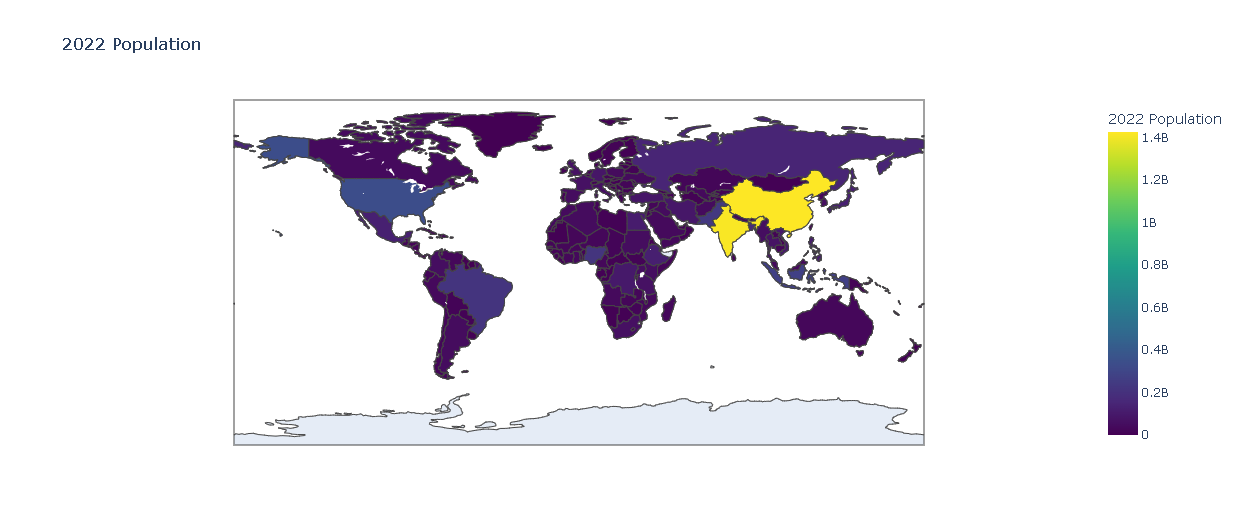

**Conclusion 2022.**

Para el año presente, se muestra que la mayoria de población se situa en India y China. Los demas paises se encuentran en niveles similares entre ellos. ( de 0B >=0.4B ).

In [31]:
fig = px.choropleth(data,
                    locations='Country',
                    locationmode='country names',
                    color='2020 Population',  
                    hover_name='Country',                    
                    title = '2020 Population',
                    color_continuous_scale='Viridis'
                    )
fig.show(renderer="colab")

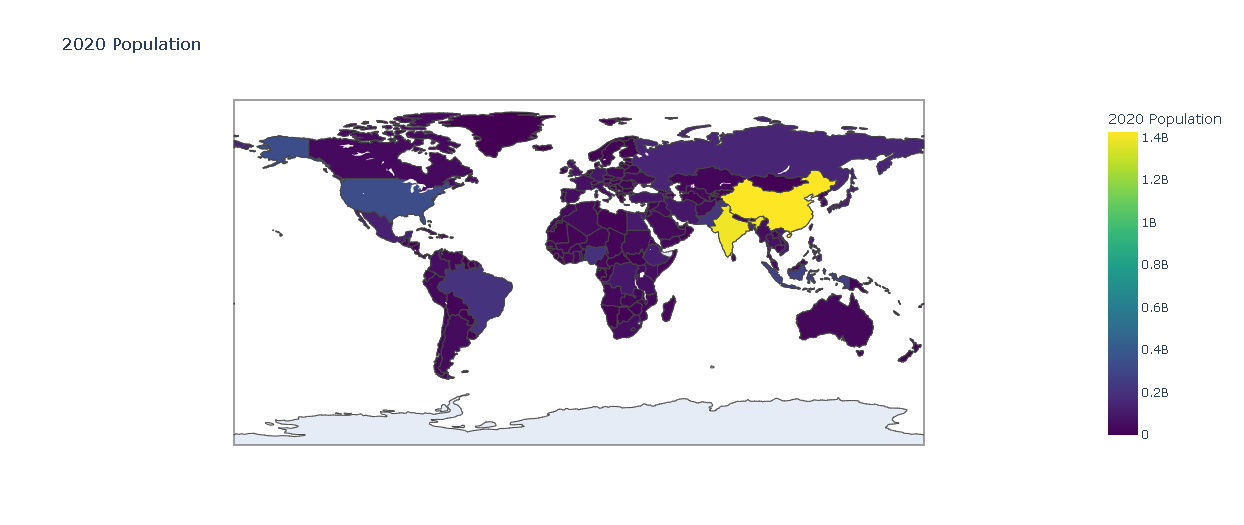

In [35]:
fig = px.choropleth(data,
                    locations='Country',
                    locationmode='country names',
                    color='2015 Population',
                    hover_name='Country',                    
                    title = '2015 Population',
                    color_continuous_scale='Viridis'
                    )
fig.show(renderer="colab")

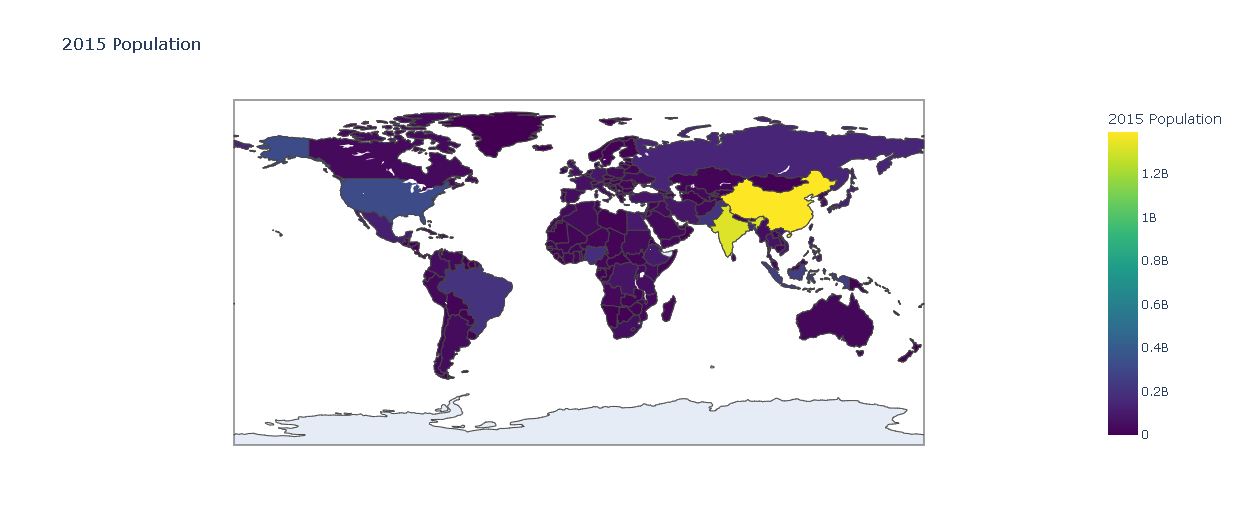

In [43]:
fig = px.choropleth(data,
                    locations='Country',
                    locationmode='country names',
                    color='2000 Population',
                    hover_name='Country',                    
                    title = '2000 Population',
                    color_continuous_scale='Viridis'
                    )
fig.show(renderer="colab")

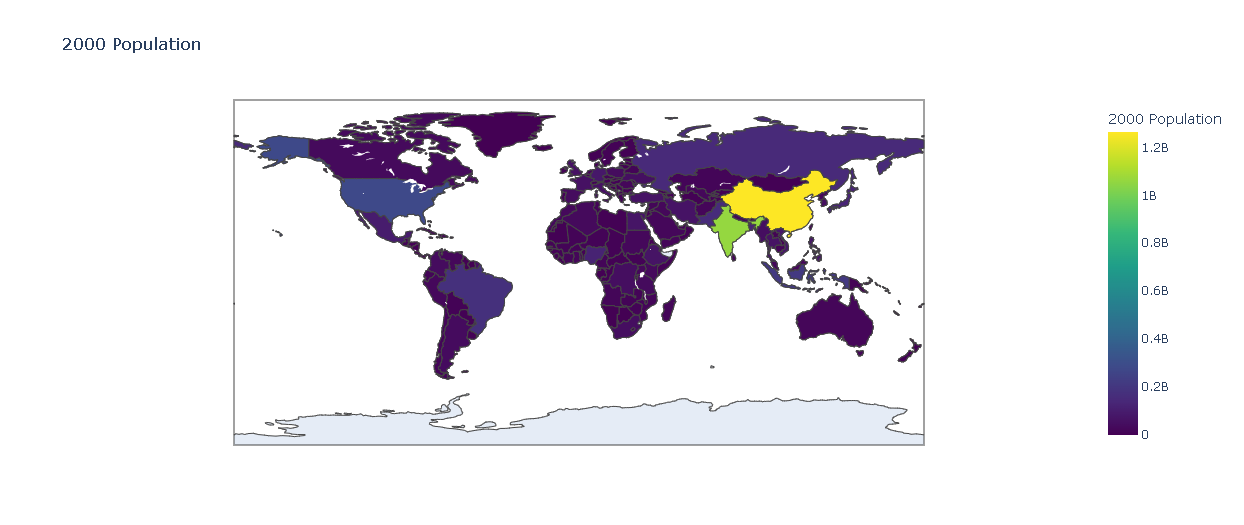

**Conclusion 2000.**

Para el año en cuestion, la poblacion en India era minimamente inferior que la de China. Sin embargo aun en ese año, era el pais con mas población en el mundo.

In [36]:
fig = px.choropleth(data,
                    locations='Country',
                    locationmode='country names',
                    color='1990 Population',
                    hover_name='Country',                    
                    title = '1990 Population',
                    color_continuous_scale='Viridis'
                    )
fig.show(renderer="colab")

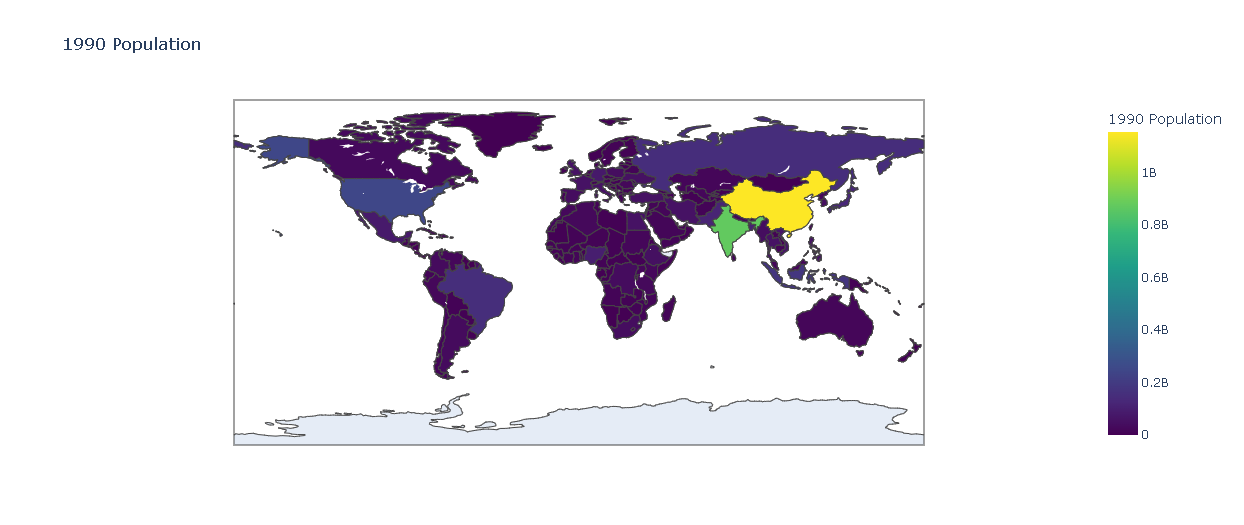

**Conclusion 1990.**

En comparacion con el año 2000, en el periodo de 10 años tuvo un incremento considerable India.
1990 = 870M 
2000 = 1.32B

In [37]:
fig = px.choropleth(data,
                    locations='Country',
                    locationmode='country names',
                    color='1980 Population',
                    hover_name='Country',                    
                    title = '1980 Population',
                    color_continuous_scale='Viridis'
                    )
fig.show(renderer ="colab")

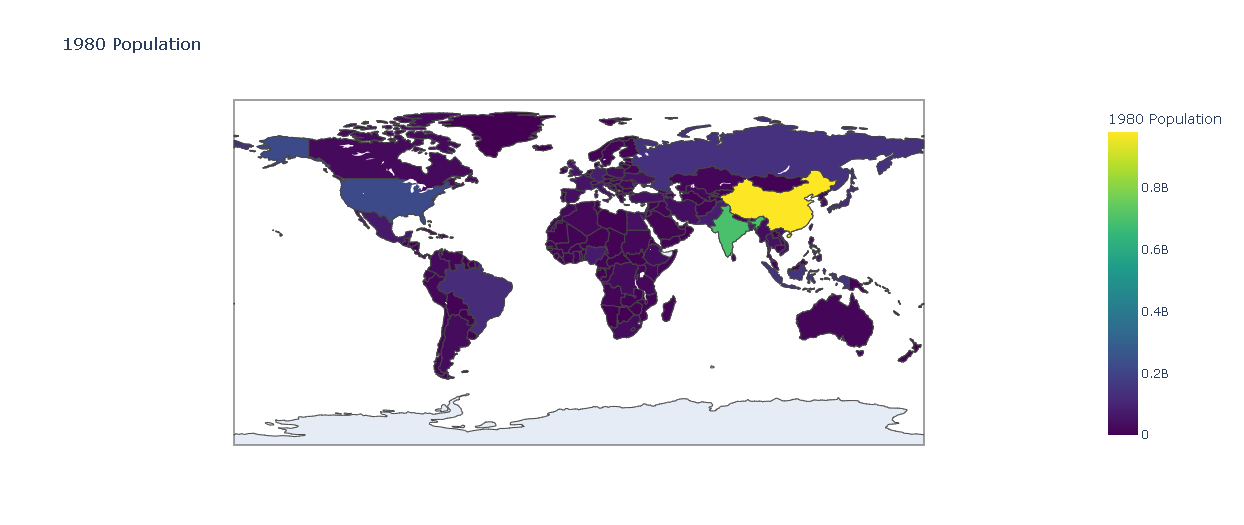

In [38]:
fig = px.choropleth(data,
                    locations='Country',
                    locationmode='country names',
                    color='World Population Percentage',
                    hover_name='Country',                    
                    title = 'World Population Percentage',
                    color_continuous_scale='Viridis'
                    )
fig.show(renderer="colab")

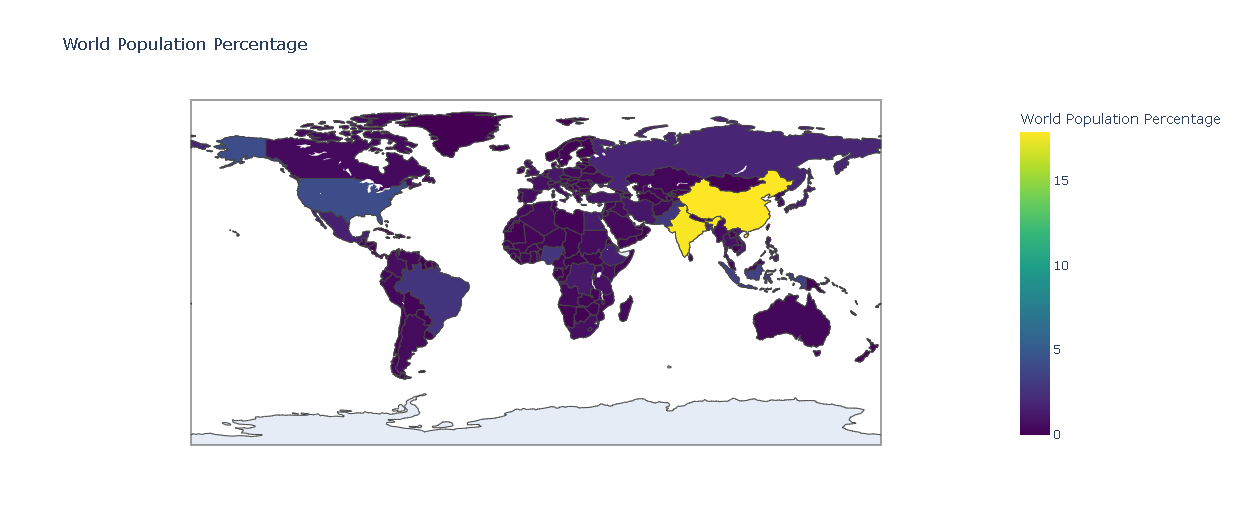

In [40]:
#Crecimiento Poblacional
fig = px.choropleth(data,
                    locations='Country',
                    locationmode='country names',
                    color='Growth Rate',
                    hover_name='Country',                    
                    title = 'Growth Rate',
                    color_continuous_scale='Viridis'
                    )
fig.show(renderer="colab")

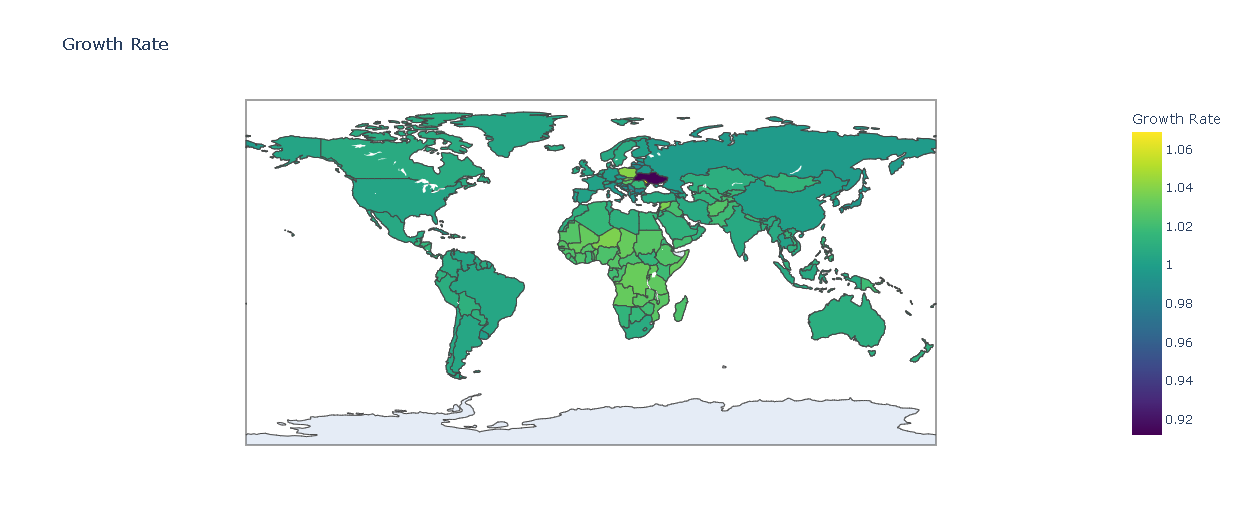

**Conclusiones generales.**

1. La mayor parte de la poblacion pertenece a los paises de India y China, 17.7% y 17.8%.
2. El crecimiento poblacional en India es ligeramente mayor al de China, esto indicaria el crecimiento exponencial en cada decada, casi equiparandose con tal pais ( 1.088% India , 1% China ).
3. Ucrania es el pais que presenta menos crecimiento poblacional con 0.912%
4. El continente Asiatico es el que presenta mayores indicadores en densidad, crecimiento poblacional y cantidad de habitantes. 
